## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [10]:
#hyper parameter 
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32,168,256]
MOMENTUM = 0.95

In [11]:
from keras.layers import BatchNormalization

results = {}
for i, n in enumerate(BATCH_SIZE):
    print('batch_size={}'.format(n))
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=n, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
        
    exp_name_tag = "exp_batch={}".format(n)
    results[exp_name_tag]={'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



batch_size=32
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)     

50000/50000 [==============================] - 58s 1ms/step - loss: 0.2930 - accuracy: 0.8960 - val_loss: 2.0408 - val_accuracy: 0.5406
Epoch 47/50
50000/50000 [==============================] - 58s 1ms/step - loss: 0.2846 - accuracy: 0.8983 - val_loss: 2.0678 - val_accuracy: 0.5377
Epoch 48/50
50000/50000 [==============================] - 76s 2ms/step - loss: 0.2748 - accuracy: 0.9014 - val_loss: 2.0737 - val_accuracy: 0.5375
Epoch 49/50
50000/50000 [==============================] - 58s 1ms/step - loss: 0.2652 - accuracy: 0.9067 - val_loss: 2.0612 - val_accuracy: 0.5394
Epoch 50/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2650 - accuracy: 0.9065 - val_loss: 2.0734 - val_accuracy: 0.5417
batch_size=168
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________________________________

Epoch 41/50
50000/50000 [==============================] - 19s 382us/step - loss: 0.0767 - accuracy: 0.9789 - val_loss: 2.4802 - val_accuracy: 0.5101
Epoch 42/50
50000/50000 [==============================] - 20s 394us/step - loss: 0.0707 - accuracy: 0.9821 - val_loss: 2.5215 - val_accuracy: 0.5067
Epoch 43/50
50000/50000 [==============================] - 19s 387us/step - loss: 0.0664 - accuracy: 0.9835 - val_loss: 2.5455 - val_accuracy: 0.5077
Epoch 44/50
50000/50000 [==============================] - 18s 357us/step - loss: 0.0620 - accuracy: 0.9848 - val_loss: 2.5512 - val_accuracy: 0.5119
Epoch 45/50
50000/50000 [==============================] - 19s 378us/step - loss: 0.0568 - accuracy: 0.9871 - val_loss: 2.6238 - val_accuracy: 0.5074
Epoch 46/50
50000/50000 [==============================] - 19s 383us/step - loss: 0.0562 - accuracy: 0.9862 - val_loss: 2.6290 - val_accuracy: 0.5105
Epoch 47/50
50000/50000 [==============================] - 22s 449us/step - loss: 0.0456 - accuracy:

50000/50000 [==============================] - 15s 297us/step - loss: 0.1121 - accuracy: 0.9778 - val_loss: 2.1851 - val_accuracy: 0.5113
Epoch 36/50
50000/50000 [==============================] - 16s 323us/step - loss: 0.1053 - accuracy: 0.9792 - val_loss: 2.2165 - val_accuracy: 0.5086
Epoch 37/50
50000/50000 [==============================] - 16s 312us/step - loss: 0.0942 - accuracy: 0.9824 - val_loss: 2.2524 - val_accuracy: 0.5140
Epoch 38/50
50000/50000 [==============================] - 15s 295us/step - loss: 0.0838 - accuracy: 0.9848 - val_loss: 2.2770 - val_accuracy: 0.5049
Epoch 39/50
50000/50000 [==============================] - 15s 299us/step - loss: 0.0805 - accuracy: 0.9852 - val_loss: 2.3151 - val_accuracy: 0.5175
Epoch 40/50
50000/50000 [==============================] - 15s 295us/step - loss: 0.0711 - accuracy: 0.9878 - val_loss: 2.3611 - val_accuracy: 0.5056
Epoch 41/50
50000/50000 [==============================] - 15s 298us/step - loss: 0.0646 - accuracy: 0.9892 - va

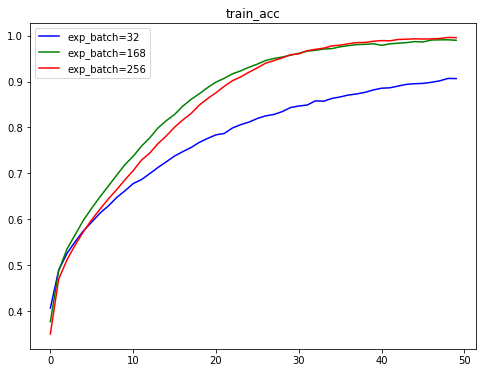

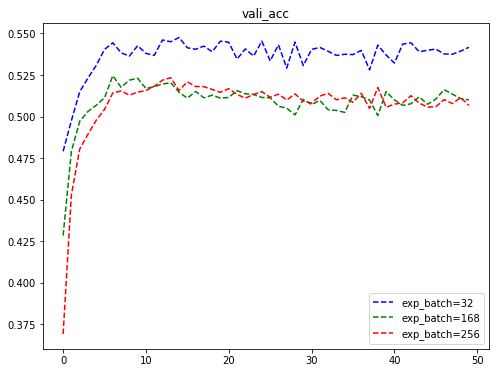

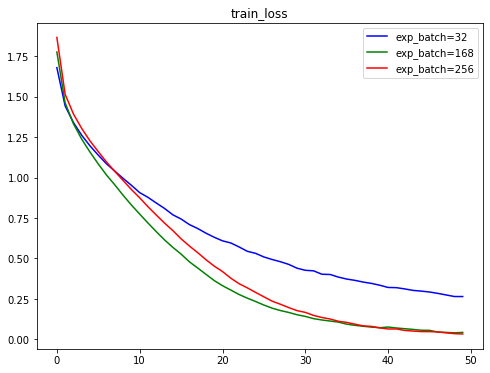

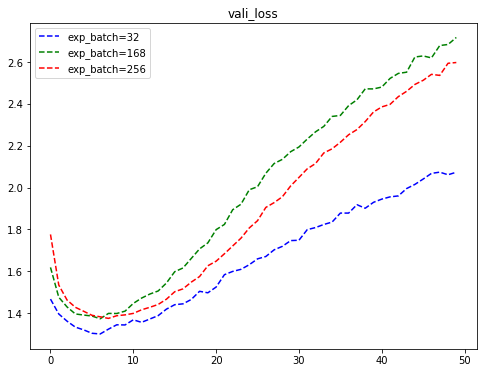

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.title("train_acc")
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("vali_acc")
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.title("train_loss")
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("vali_loss")
    plt.legend()
plt.show()

## 把 batch_norm 放在 act 前面

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [16]:
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=1024, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290

50000/50000 [==============================] - 10s 205us/step - loss: 0.6659 - accuracy: 0.7926 - val_loss: 1.4884 - val_accuracy: 0.5103
Epoch 48/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.6494 - accuracy: 0.7985 - val_loss: 1.4982 - val_accuracy: 0.5098
Epoch 49/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.6353 - accuracy: 0.8051 - val_loss: 1.5126 - val_accuracy: 0.5014
Epoch 50/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.6181 - accuracy: 0.8131 - val_loss: 1.5183 - val_accuracy: 0.5062


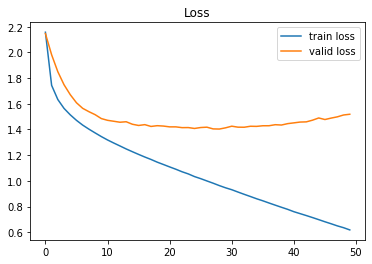

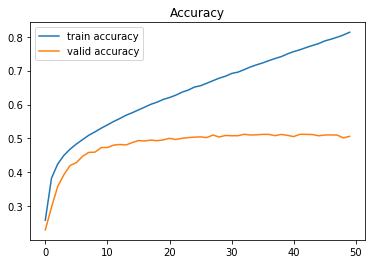

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 把 batch_nor 放在 input_layer後

In [18]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=1024, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

Epoch 46/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5332 - accuracy: 0.8520 - val_loss: 1.5203 - val_accuracy: 0.5079
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5159 - accuracy: 0.8577 - val_loss: 1.5286 - val_accuracy: 0.5029
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.4970 - accuracy: 0.8665 - val_loss: 1.5398 - val_accuracy: 0.5102
Epoch 49/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.4795 - accuracy: 0.8729 - val_loss: 1.5507 - val_accuracy: 0.5040
Epoch 50/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.4631 - accuracy: 0.8799 - val_loss: 1.5648 - val_accuracy: 0.5071


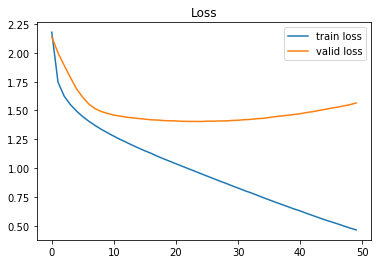

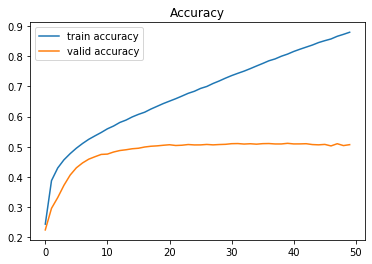

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()